In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [46]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [47]:
data=pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [49]:
data=pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'])
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Taxable.Income           600 non-null    int64
 1   City.Population          600 non-null    int64
 2   Work.Experience          600 non-null    int64
 3   Undergrad_NO             600 non-null    uint8
 4   Undergrad_YES            600 non-null    uint8
 5   Marital.Status_Divorced  600 non-null    uint8
 6   Marital.Status_Married   600 non-null    uint8
 7   Marital.Status_Single    600 non-null    uint8
 8   Urban_NO                 600 non-null    uint8
 9   Urban_YES                600 non-null    uint8
dtypes: int64(3), uint8(7)
memory usage: 18.3 KB


In [52]:
data['Taxable.Income']=data['Taxable.Income'].map(lambda x:1 if x>30000 else 0)
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,1,50047,10,1,0,0,0,1,0,1
1,1,134075,18,0,1,1,0,0,0,1
2,1,160205,30,1,0,0,1,0,0,1
3,1,193264,15,0,1,0,0,1,0,1
4,1,27533,28,1,0,0,1,0,1,0


<Axes: >

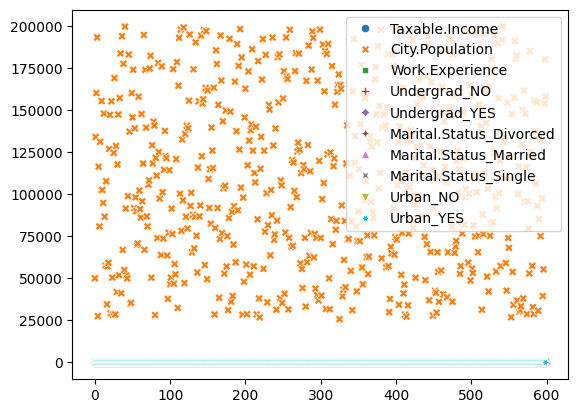

In [53]:
sns.scatterplot(data)

<ipython-input-54-946844e4f3c9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Taxable.Income'])


<Axes: xlabel='Taxable.Income', ylabel='Density'>

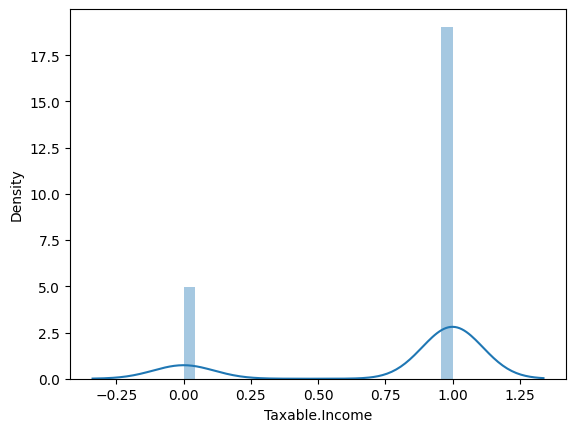

In [54]:
sns.distplot(data['Taxable.Income'])

In [55]:
x=data.iloc[:,1:]
y=data.iloc[:,0]
x

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [56]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=200)

Building Decision Tree Classifier

In [57]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

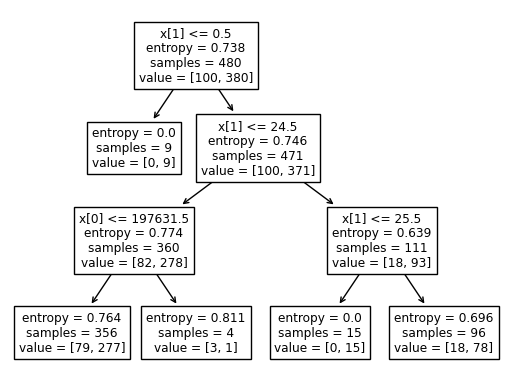

In [58]:
tree.plot_tree(model);

In [59]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [60]:
df=pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df

,Actual,Prediction
260,1,1
240,1,1
443,0,1
454,1,1
425,1,1
...,...,...
448,1,1
127,1,1
180,1,1
330,1,1


In [61]:
accuracy_entropy=accuracy_score(y_test,y_pred)
accuracy_entropy

0.7833333333333333

## Normalization

In [62]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return x

In [63]:
data=norm_func(data)
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,1.0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
595,1.0,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,1.0,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,1.0,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,1.0,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [64]:
x= data.iloc[:,1:]
y=data.iloc[:,0]

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [66]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [67]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.375, 0.875, 'x[1] <= 0.017\nentropy = 0.701\nsamples = 480\nvalue = [91, 389]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.5, 0.625, 'x[0] <= 0.321\nentropy = 0.71\nsamples = 469\nvalue = [91, 378]'),
 Text(0.25, 0.375, 'x[0] <= 0.285\nentropy = 0.628\nsamples = 165\nvalue = [26, 139]'),
 Text(0.125, 0.125, 'entropy = 0.673\nsamples = 147\nvalue = [26, 121]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.75, 0.375, 'x[0] <= 0.329\nentropy = 0.749\nsamples = 304\nvalue = [65, 239]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.875, 0.125, 'entropy = 0.729\nsamples = 300\nvalue = [61, 239]')]

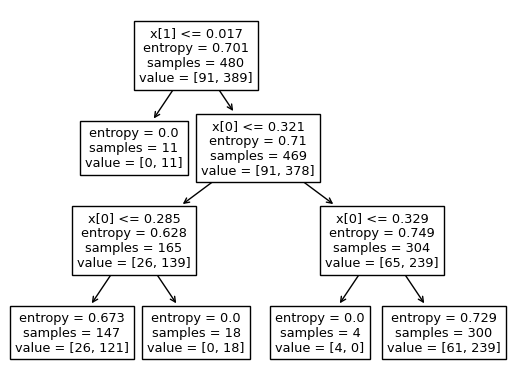

In [68]:
tree.plot_tree(model)

In [69]:
y_pred=model.predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [70]:
df=pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df

,Actual,Prediction
347,0.0,1.0
567,0.0,1.0
438,0.0,1.0
165,1.0,1.0
271,1.0,1.0
...,...,...
13,1.0,1.0
242,1.0,1.0
433,0.0,1.0
437,0.0,1.0


In [71]:
entropy_accuracy_norm=accuracy_score(y_test,y_pred)
entropy_accuracy_norm

0.725

In [72]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_logistic=accuracy_score(y_test,y_pred)
accuracy_logistic

0.725

In [73]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x_train,y_train)
y_pred=model_gini.predict(x_test)
accuracy_gini=accuracy_score(y_test,y_pred)
accuracy_gini*100

70.0